In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Visualizar encoding, delimitador, ...
with open("Dados/MICRODADOS_ENEM_2021.csv") as file:
    print(file.readline())

NU_INSCRICAO;NU_ANO;TP_FAIXA_ETARIA;TP_SEXO;TP_ESTADO_CIVIL;TP_COR_RACA;TP_NACIONALIDADE;TP_ST_CONCLUSAO;TP_ANO_CONCLUIU;TP_ESCOLA;TP_ENSINO;IN_TREINEIRO;CO_MUNICIPIO_ESC;NO_MUNICIPIO_ESC;CO_UF_ESC;SG_UF_ESC;TP_DEPENDENCIA_ADM_ESC;TP_LOCALIZACAO_ESC;TP_SIT_FUNC_ESC;CO_MUNICIPIO_PROVA;NO_MUNICIPIO_PROVA;CO_UF_PROVA;SG_UF_PROVA;TP_PRESENCA_CN;TP_PRESENCA_CH;TP_PRESENCA_LC;TP_PRESENCA_MT;CO_PROVA_CN;CO_PROVA_CH;CO_PROVA_LC;CO_PROVA_MT;NU_NOTA_CN;NU_NOTA_CH;NU_NOTA_LC;NU_NOTA_MT;TX_RESPOSTAS_CN;TX_RESPOSTAS_CH;TX_RESPOSTAS_LC;TX_RESPOSTAS_MT;TP_LINGUA;TX_GABARITO_CN;TX_GABARITO_CH;TX_GABARITO_LC;TX_GABARITO_MT;TP_STATUS_REDACAO;NU_NOTA_COMP1;NU_NOTA_COMP2;NU_NOTA_COMP3;NU_NOTA_COMP4;NU_NOTA_COMP5;NU_NOTA_REDACAO;Q001;Q002;Q003;Q004;Q005;Q006;Q007;Q008;Q009;Q010;Q011;Q012;Q013;Q014;Q015;Q016;Q017;Q018;Q019;Q020;Q021;Q022;Q023;Q024;Q025



In [6]:
df = pd.read_csv("Dados/MICRODADOS_ENEM_2021.csv", 
                 encoding='cp1252',
                delimiter=";",
                nrows=1000000)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 76 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   NU_INSCRICAO            1000000 non-null  int64  
 1   NU_ANO                  1000000 non-null  int64  
 2   TP_FAIXA_ETARIA         1000000 non-null  int64  
 3   TP_SEXO                 1000000 non-null  object 
 4   TP_ESTADO_CIVIL         1000000 non-null  int64  
 5   TP_COR_RACA             1000000 non-null  int64  
 6   TP_NACIONALIDADE        1000000 non-null  int64  
 7   TP_ST_CONCLUSAO         1000000 non-null  int64  
 8   TP_ANO_CONCLUIU         1000000 non-null  int64  
 9   TP_ESCOLA               1000000 non-null  int64  
 10  TP_ENSINO               426460 non-null   float64
 11  IN_TREINEIRO            1000000 non-null  int64  
 12  CO_MUNICIPIO_ESC        293025 non-null   float64
 13  NO_MUNICIPIO_ESC        293025 non-null   object 
 14  CO_

In [10]:
df[["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,745279.000000,781543.000000,781543.000000,745279.000000,781543.000000
mean,487.988832,518.547912,500.673120,530.683948,630.155705
std,80.732721,94.831908,78.799472,109.768162,190.976571
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,427.500000,444.800000,445.800000,441.800000,540.000000
50%,476.300000,518.900000,502.900000,508.400000,620.000000
75%,539.900000,586.500000,556.000000,605.900000,760.000000
max,867.100000,846.900000,813.200000,953.100000,1000.000000


In [14]:
p_CN = df["TP_PRESENCA_CN"].sum() / len(df["TP_PRESENCA_CN"])
p_CN

0.6633785981134168

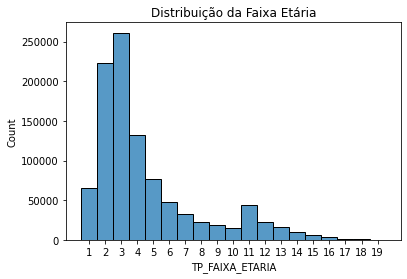

In [66]:
hist = sns.histplot(df["TP_FAIXA_ETARIA"], binwidth=1);

# Posição dos xticks vai ser o limite direito da barra 
# mais metade de seu comprimento
xticks = [rec.get_x() + 0.5*hist.patches[0].get_width() for rec in list(hist.patches)]

plt.xticks(xticks, labels=range(1, 20))
plt.title("Distribuição da Faixa Etária")
plt.show()

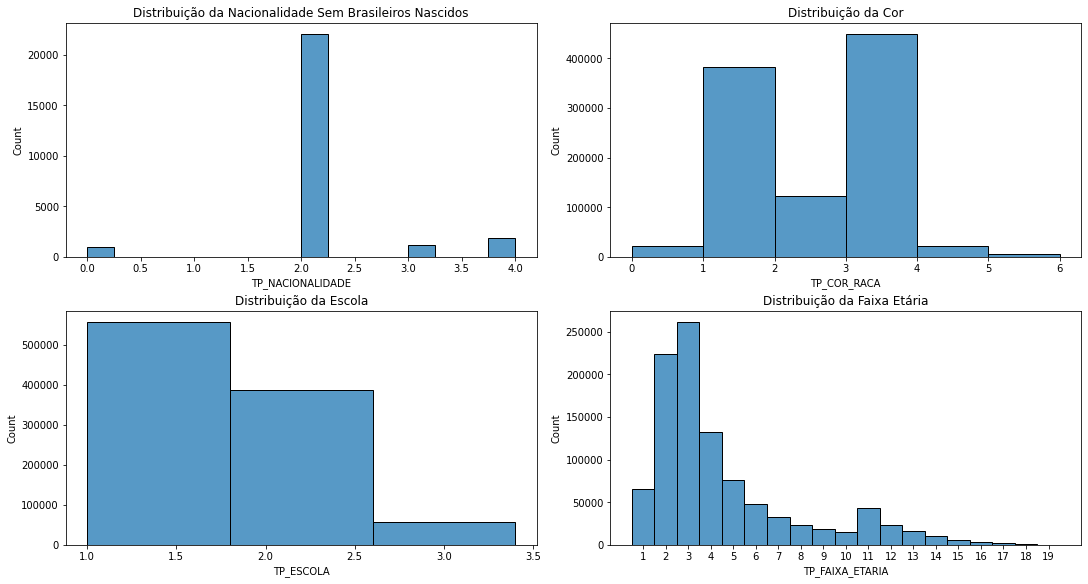

In [118]:
fig, axs = plt.subplots(2, 2, layout="constrained", figsize=(15,8))


# ----------------------- Distribuição da Nacionalidade -----------------------
sns.histplot(df.loc[df["TP_NACIONALIDADE"]!=1, "TP_NACIONALIDADE"], ax=axs[0, 0]);
axs[0, 0].title.set_text("Distribuição da Nacionalidade Sem Brasileiros Nascidos")
# ---------------------------------------------------------------------------


# ----------------------- Distribuição da Cor -----------------------
sns.histplot(df["TP_COR_RACA"], ax=axs[0, 1], binwidth=1, bins=7);
axs[0, 1].title.set_text("Distribuição da Cor")
# ---------------------------------------------------------------------------


# ----------------------- Distribuição da Escola -----------------------
sns.histplot(df["TP_ESCOLA"], ax=axs[1, 0], binwidth=0.8);
axs[1, 0].title.set_text("Distribuição da Escola")
# ---------------------------------------------------------------------------


# ----------------------- Distribuição da Faixa Etária -----------------------
hist = sns.histplot(df["TP_FAIXA_ETARIA"], ax=axs[1, 1], binwidth=1);

# Posição dos xticks vai ser o limite direito da barra 
# mais metade de seu comprimento
xticks = [rec.get_x() + 0.5*hist.patches[0].get_width() for rec in list(hist.patches)]

axs[1, 1].set_xticks(xticks, labels=range(1, 20))
axs[1, 1].title.set_text("Distribuição da Faixa Etária")
# ---------------------------------------------------------------------------

In [80]:
df.loc[df["TP_FAIXA_ETARIA"]==20, "TP_FAIXA_ETARIA"]

696       20
13595     20
27874     20
56882     20
58937     20
          ..
959200    20
959225    20
972990    20
979506    20
984453    20
Name: TP_FAIXA_ETARIA, Length: 82, dtype: int64

In [30]:
df["SG_UF_PROVA"].unique()

array(['MG', 'AL', 'SP', 'CE', 'RS', 'BA', 'GO', 'RN', 'PA', 'RJ', 'MT',
       'PE', 'MA', 'RO', 'SE', 'PR', 'PB', 'PI', 'ES', 'DF', 'TO', 'AM',
       'SC', 'AP', 'MS', 'RR', 'AC'], dtype=object)